# 1. Implemente las 4 funciones posibles de {0,1} a {0,1} usando el computador cuántico de IBM.

## Dibujo de función
las imagennes se muestran en  la carpeta (funciones punto 1)

## Matriz correpondiente
|x⟩|y⟩ → |x⟩|y⊕f(x)⟩ = |x⟩|y⊕0⟩ = |x⟩|y⟩

Matriz identidad: 

[1 0 0 0]

[0 1 0 0]

[0 0 1 0]

[0 0 0 1]
 
|x⟩|y⟩ → |x⟩|y⊕1⟩

Matriz: 

[0 1 0 0]

[1 0 0 0]

[0 0 0 1]

[0 0 1 0]
 
|x⟩|y⟩ → |x⟩|y⊕x⟩

Matriz CNOT:

[1 0 0 0]

[0 1 0 0]

[0 0 0 1]

[0 0 1 0]
 
|x⟩|y⟩ → |x⟩|y⊕¬x⟩

Matriz: CNOT con X en el qubit de entrada

[0 1 0 0]

[1 0 0 0]

[0 0 1 0]

[0 0 0 1]
 

## Circuito correspondiente
1. Función constante 0
 
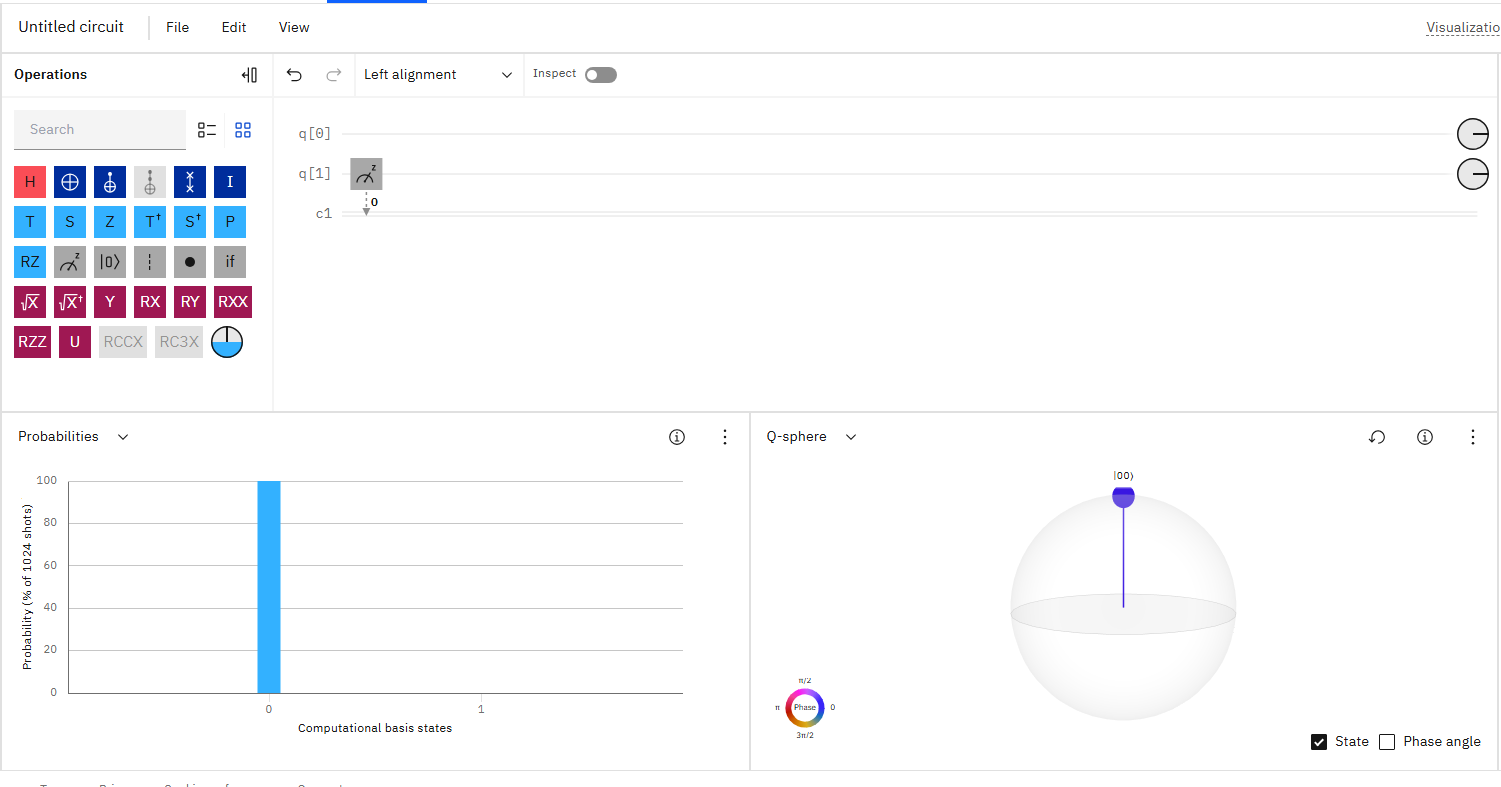

2. Función constante 1

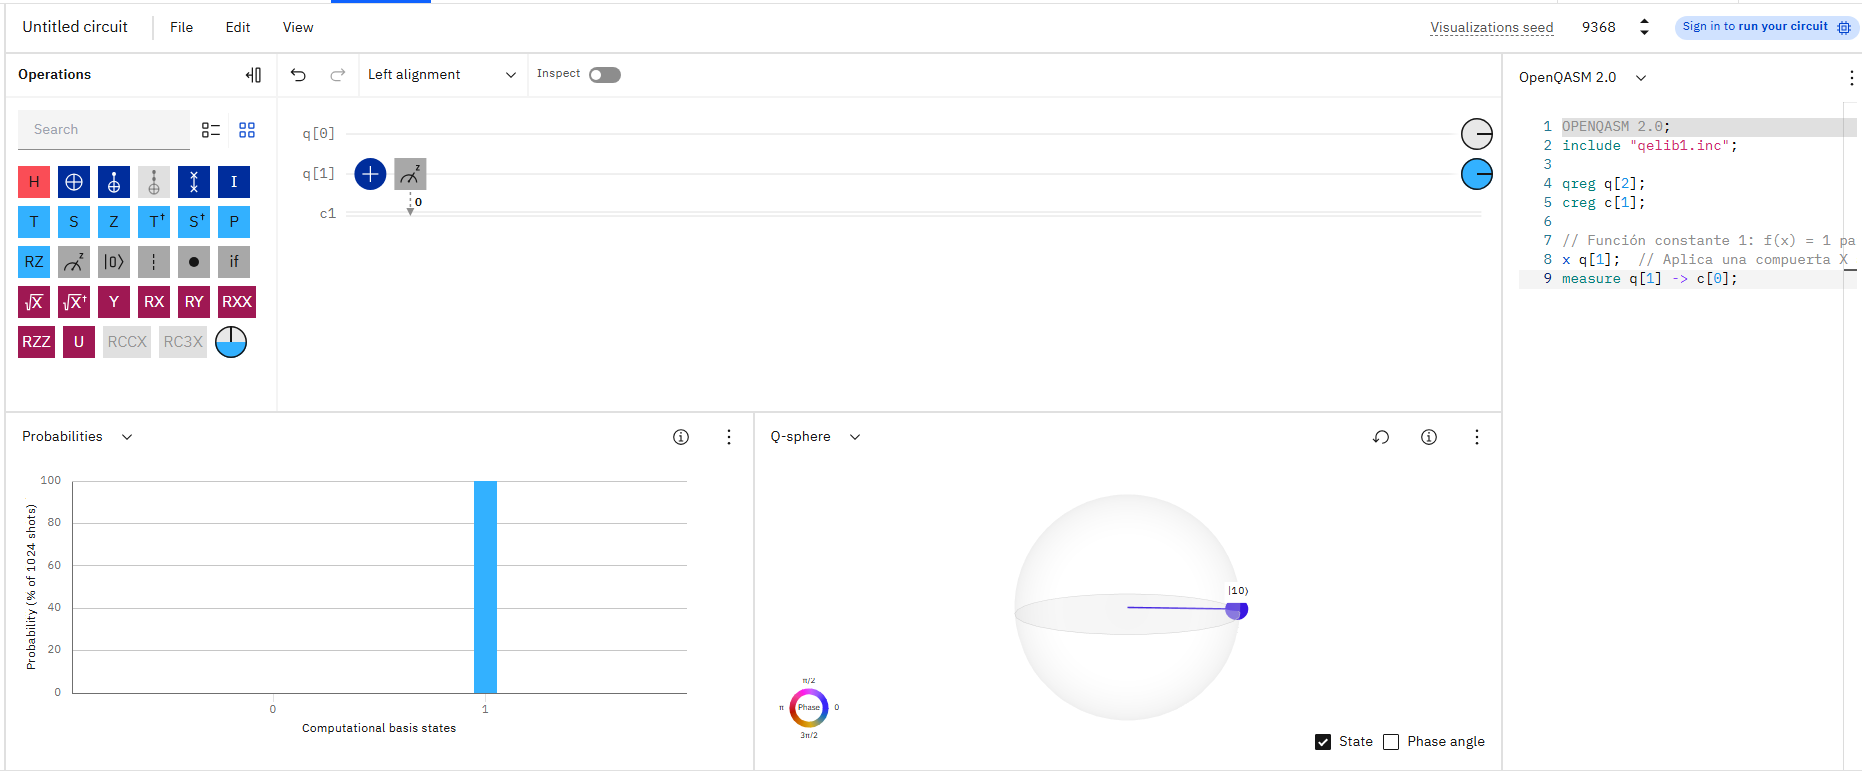
 
3. Función identidad

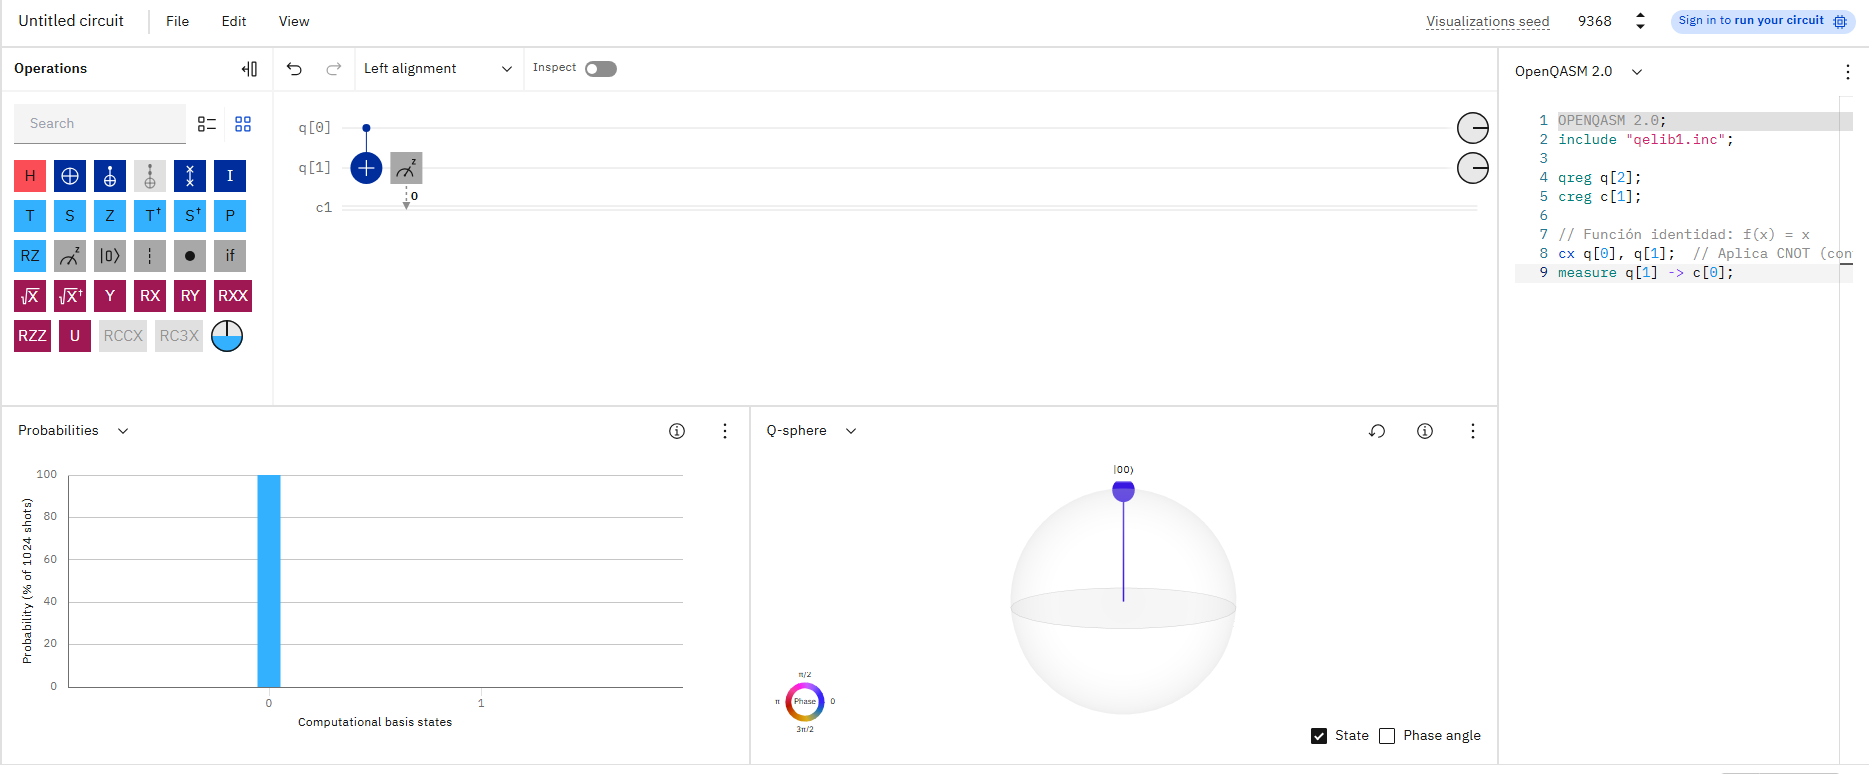
 
4. Función negación
 
 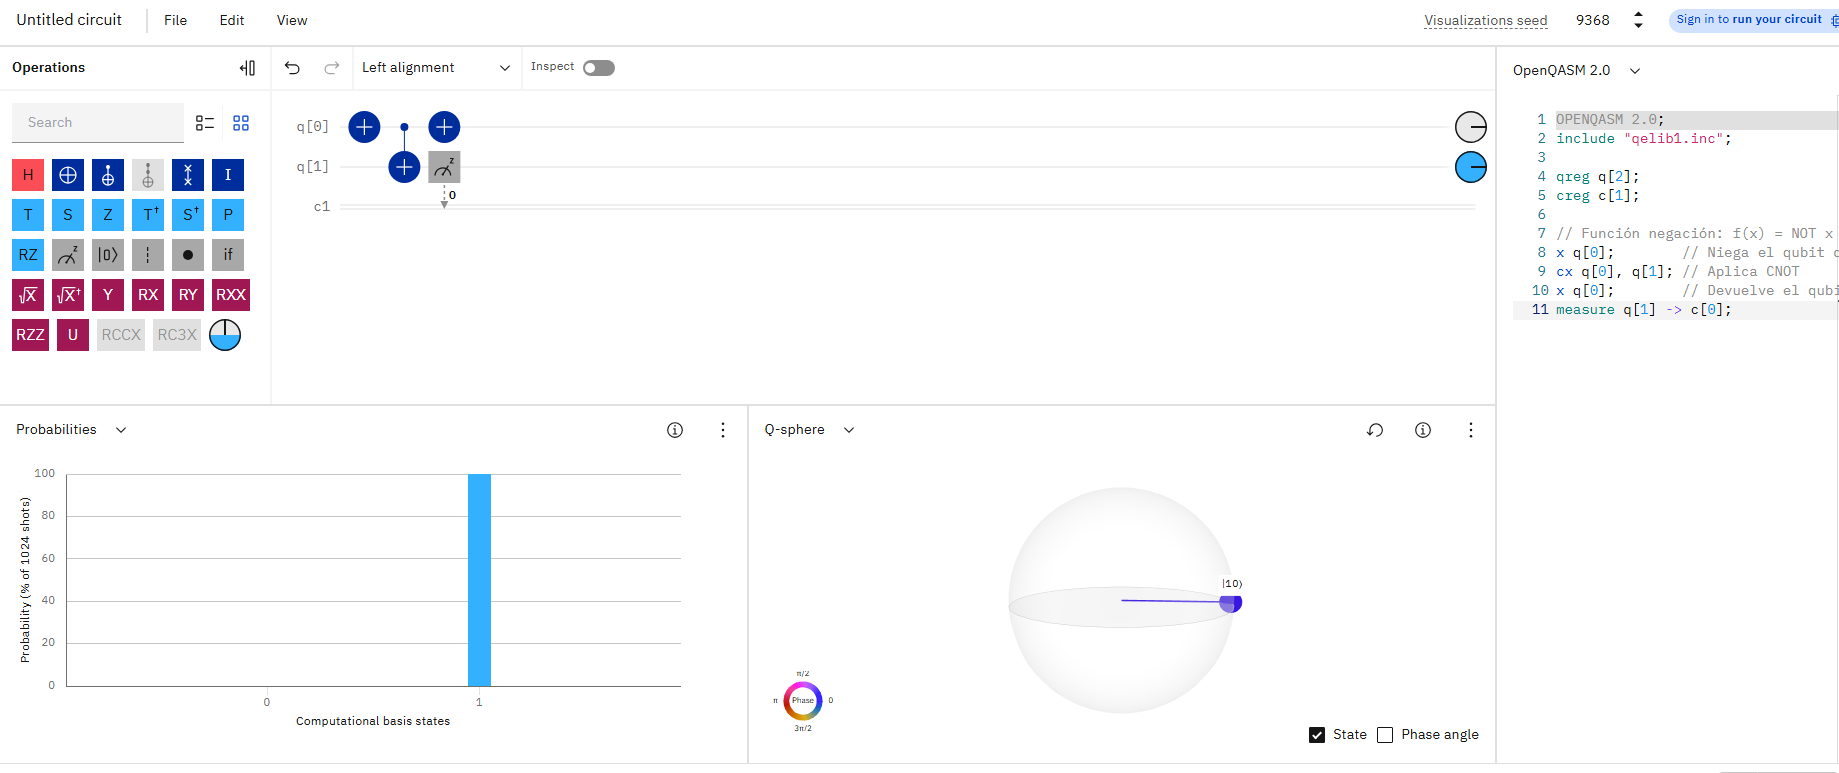

# 2. Verifique que el algoritmos de Deutsch funciona para comprobar cuáles de estas funciones son balanceadas o constantes.

## Circuito
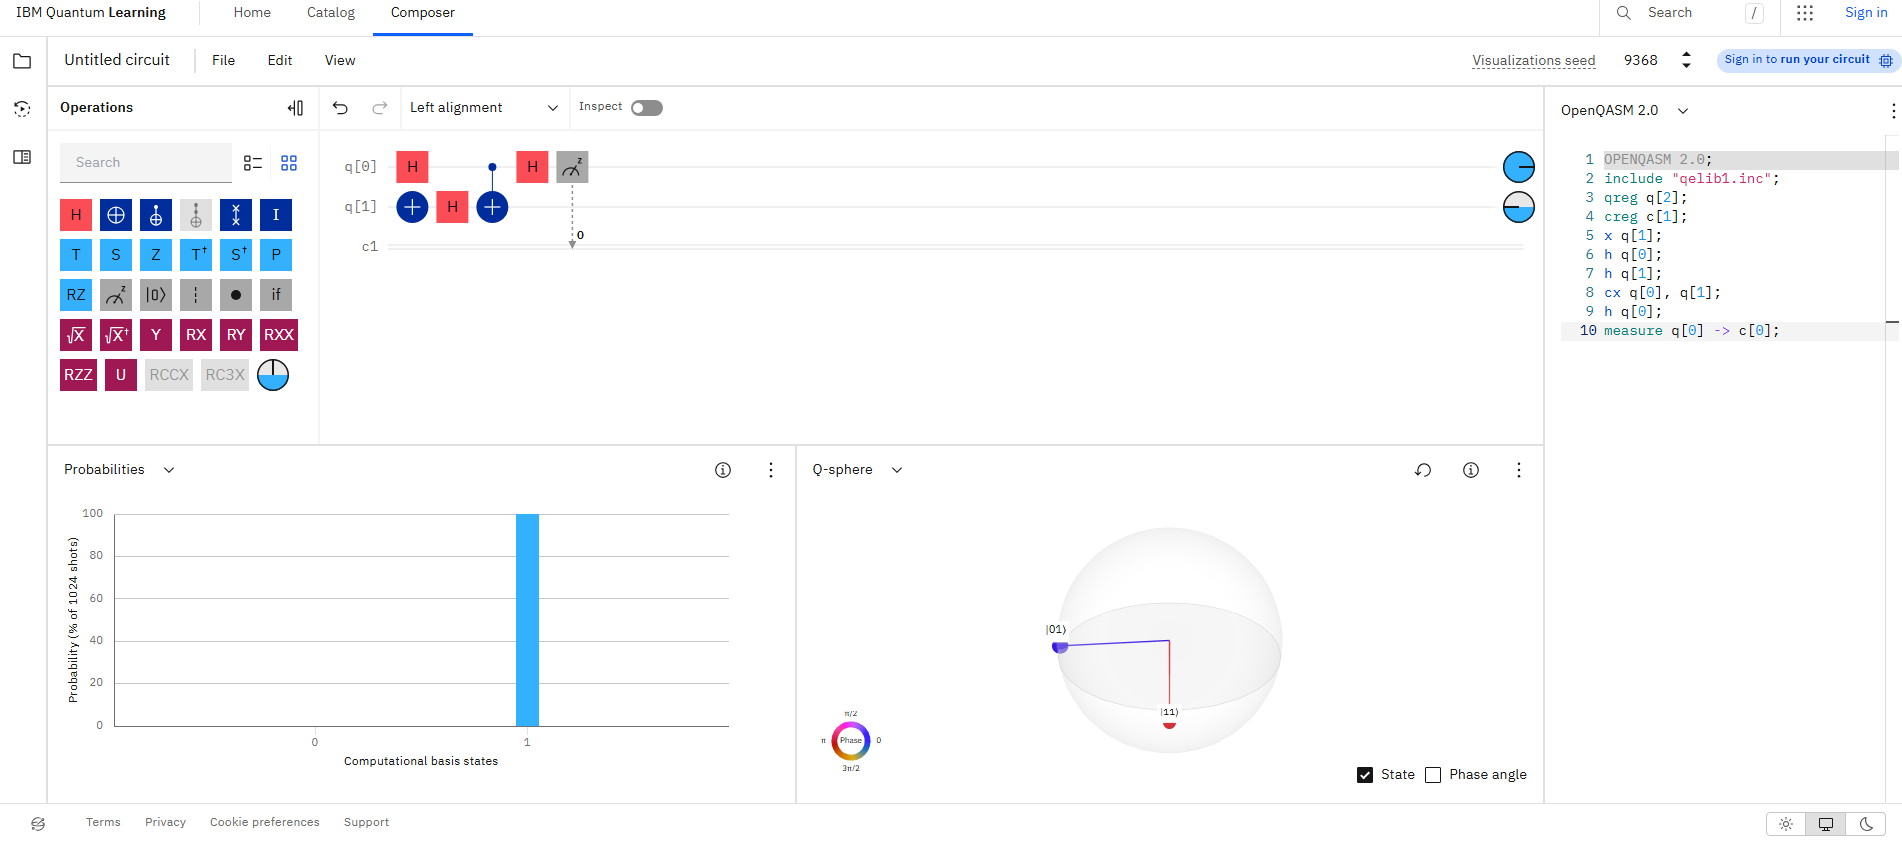

# 3. Implemente al menos 4 funciones con n= 4 (3 balanceadas y una constante) para probar el funcionamiento del algoritmo Deustch-Jozsa

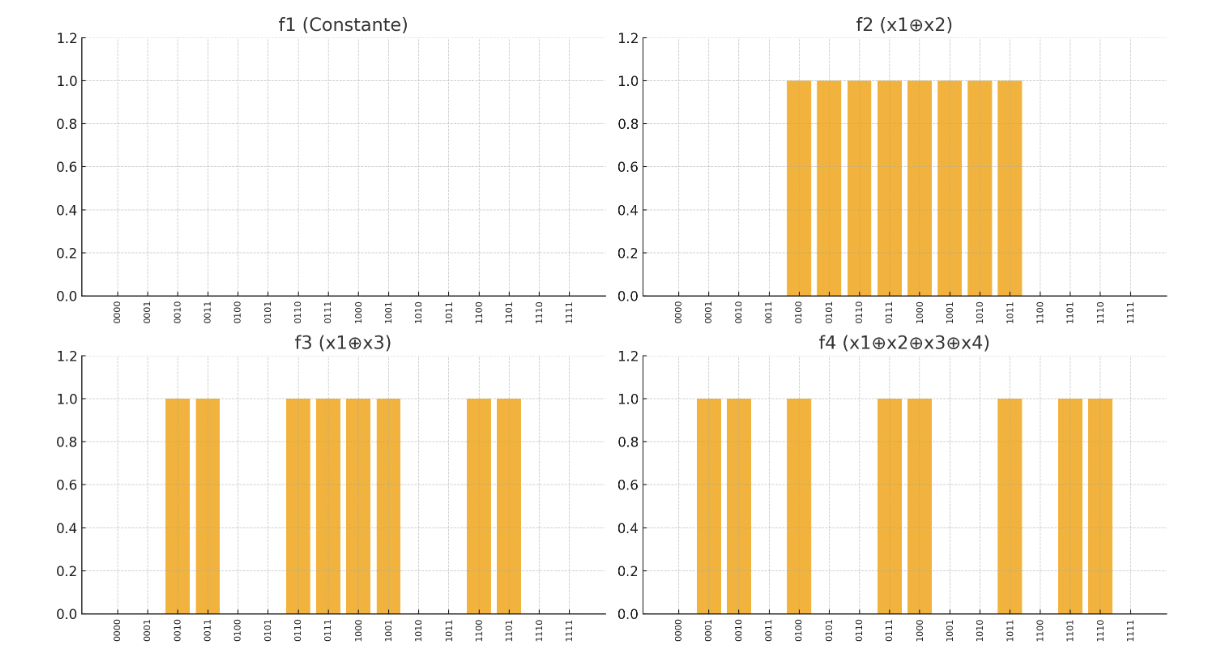

### 1. Funciones usadas

* **Constante**:

  * $f_1(x) = 0$
* **Balanceadas**:

  * $f_2(x) = x_1 \oplus x_2$
  * $f_3(x) = x_1 \oplus x_3$
  * $f_4(x) = x_1 \oplus x_2 \oplus x_3 \oplus x_4$

---

### 2. Dibujos de las funciones (gráficos de barra)

Estos gráficos muestran visualmente el valor de cada función para las 16 combinaciones posibles de 4 bits:

(La imagen de Arriba)

* $f_1$ siempre da 0 → constante.
* $f_2, f_3, f_4$ devuelven mitad 0 y mitad 1 → balanceadas.

---

### 3. Tabla de verdad

| Entrada | $f_1$ | $f_2 = x_1 \oplus x_2$ | $f_3 = x_1 \oplus x_3$ | $f_4 = x_1 \oplus x_2 \oplus x_3 \oplus x_4$ |
| ------- | ----- | ---------------------- | ---------------------- | -------------------------------------------- |
| 0000    | 0     | 0                      | 0                      | 0                                            |
| 0001    | 0     | 0                      | 0                      | 1                                            |
| 0010    | 0     | 0                      | 1                      | 1                                            |
| 0011    | 0     | 0                      | 1                      | 0                                            |
| 0100    | 0     | 1                      | 0                      | 1                                            |
| 0101    | 0     | 1                      | 0                      | 0                                            |
| 0110    | 0     | 1                      | 1                      | 0                                            |
| 0111    | 0     | 1                      | 1                      | 1                                            |
| 1000    | 0     | 1                      | 1                      | 1                                            |
| 1001    | 0     | 1                      | 1                      | 0                                            |
| 1010    | 0     | 1                      | 0                      | 0                                            |
| 1011    | 0     | 1                      | 0                      | 1                                            |
| 1100    | 0     | 0                      | 1                      | 0                                            |
| 1101    | 0     | 0                      | 1                      | 1                                            |
| 1110    | 0     | 0                      | 0                      | 1                                            |
| 1111    | 0     | 0                      | 0                      | 0                                            |

---

### 4. Circuito Deutsch-Jozsa (Qiskit)

```python
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

def deutsch_jozsa_oracle(f):
    oracle = QuantumCircuit(5)
    for i, x in enumerate(product([0, 1], repeat=4)):
        if f(x):
            for j in range(4):
                if x[j] == 0:
                    oracle.x(j)
            oracle.mcx([0, 1, 2, 3], 4)  # Multi-controlled X
            for j in range(4):
                if x[j] == 0:
                    oracle.x(j)
    return oracle

def deutsch_jozsa_algorithm(f):
    qc = QuantumCircuit(5, 4)
    qc.x(4)
    qc.h(range(5))
    
    oracle = deutsch_jozsa_oracle(f)
    qc.append(oracle.to_gate(), range(5))

    qc.h(range(4))
    
    qc.measure(range(4), range(4))
    
    return qc

# Ejemplo con f1
qc_f1 = deutsch_jozsa_algorithm(lambda x: 0) 
qc_f1.draw('mpl')
```

---

### 5. Resultado esperado

| Función            | Resultado esperado |
| ------------------ | ------------------ |
| $f_1$ (constante)  | 0000               |
| $f_2$ (balanceada) | distinto de 0000   |
| $f_3$ (balanceada) | distinto de 0000   |
| $f_4$ (balanceada) | distinto de 0000   |

---

### 6. Conclusión

El algoritmo Deutsch-Jozsa identifica correctamente si una función es constante o balanceada usando solo una consulta al oráculo cuántico, lo cual representa una gran ventaja frente a los métodos clásicos (que requieren hasta $2^{n-1} + 1$ evaluaciones).


In [ ]:
##El codigo del punto 3

from itertools import product
import matplotlib.pyplot as plt
import pandas as pd

# Entradas de 4 bits
inputs = [''.join(bits) for bits in product('01', repeat=4)]

# Definición de funciones
def f1(x): return 0
def f2(x): return int(x[0]) ^ int(x[1])
def f3(x): return int(x[0]) ^ int(x[2])
def f4(x): return int(x[0]) ^ int(x[1]) ^ int(x[2]) ^ int(x[3])

# Evaluación de funciones
results = {
    "f1 (Constante)": [f1(x) for x in inputs],
    "f2 (x1⊕x2)": [f2(x) for x in inputs],
    "f3 (x1⊕x3)": [f3(x) for x in inputs],
    "f4 (x1⊕x2⊕x3⊕x4)": [f4(x) for x in inputs]
}

# Crear DataFrame
df = pd.DataFrame({'Entrada': inputs})
for name, values in results.items():
    df[name] = values

# Dibujar gráficos
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
titles = list(results.keys())

for ax, key in zip(axes.flatten(), titles):
    ax.bar(df['Entrada'], df[key], color='skyblue', edgecolor='black')
    ax.set_title(key, fontsize=14)
    ax.set_xticks(range(len(inputs)))
    ax.set_xticklabels(df['Entrada'], rotation=90, fontsize=8)
    ax.set_ylim(0, 1.2)
    ax.set_ylabel('Salida')

plt.tight_layout()
plt.show()

# 4. Explique sus resultados.

## punto 1

1.1     Función Constante 0 (f(x) = 0)

- No modifica el qubit de salida
- Siempre devuelve 0 independientemente de la entrada
- Matriz unitaria: Identidad (I ⊗ I)

1.2     Función Constante 1 (f(x) = 1)

- Aplica una compuerta X al qubit de salida
- Siempre devuelve 1 independientemente de la entrada
- Matriz unitaria: I ⊗ X

1.3     Función Identidad (f(x) = x)

- Usa una compuerta CNOT controlada por la entrada
- Copia el valor de entrada a la salida
- Matriz unitaria: CNOT estándar

1.4     Función Negación (f(x) = ¬x)

- Niega temporalmente la entrada
- Aplica CNOT
- Restaura la entrada original
- Equivale a aplicar X al target cuando el control es 0
- Matriz unitaria: (X ⊗ I)·CNOT·(X ⊗ I)

## punto 2

- Donde la compuerta X en q[1] se aplica según la función que se esté probando.
Este circuito permite verificar experimentalmente que el algoritmo de Deutsch funciona correctamente para clasificar funciones como balanceadas o constantes con una sola evaluación cuántica.


## Explicación del Punto 3: Ejemplo con $n = 4$ en el algoritmo de Deutsch-Jozsa

En este punto se implementó el algoritmo de Deutsch-Jozsa para el caso en que la función de entrada tiene cuatro bits, es decir, $n = 4$. Esto implica que existen $2^4 = 16$ posibles combinaciones de entrada. El objetivo es identificar si una función dada es constante o balanceada evaluándola de manera cuántica.

### Paso 1: Definición de funciones

Se definieron cuatro funciones booleanas $f : \{0,1\}^4 \to \{0,1\}$. De estas, una es constante y las otras tres son balanceadas:

1. $f_1(x) = 0$: Esta función es constante, ya que siempre devuelve 0 sin importar la entrada.
2. $f_2(x) = x_1 \oplus x_2$: Esta función es balanceada, pues devuelve 0 en la mitad de las entradas y 1 en la otra mitad.
3. $f_3(x) = x_1 \oplus x_3$: También balanceada, con el mismo patrón de 8 ceros y 8 unos, pero afectada por diferentes bits.
4. $f_4(x) = x_1 \oplus x_2 \oplus x_3 \oplus x_4$: Es otra función balanceada que depende de todos los bits de la entrada.

### Paso 2: Evaluación de las funciones

Se evaluaron estas funciones sobre las 16 combinaciones binarias de 4 bits, generando una tabla de verdad que muestra para cada entrada los valores correspondientes de cada función. Esto permite verificar visualmente cuáles funciones son balanceadas y cuál es constante.

Por ejemplo:

* En la función $f_1$, todas las salidas son 0.
* En las funciones $f_2$, $f_3$ y $f_4$, el número de ceros y unos es exactamente el mismo (8 y 8), lo que confirma que son balanceadas.

### Paso 3: Visualización gráfica

Se generaron gráficos de barras para cada función. En el eje X se colocaron las entradas binarias (de "0000" a "1111") y en el eje Y los valores de salida (0 o 1). Esta representación permite visualizar el comportamiento de cada función:

* El gráfico de $f_1$ muestra una línea constante en 0, lo que evidencia su naturaleza constante.
* Los gráficos de $f_2$, $f_3$ y $f_4$ presentan un patrón equilibrado de 0s y 1s.

Estos gráficos permiten confirmar de forma visual la clasificación de cada función.

### Paso 4 (opcional): Relación con el algoritmo Deutsch-Jozsa

El algoritmo Deutsch-Jozsa tiene como objetivo determinar, con una sola evaluación cuántica (consulta al oráculo), si una función es constante o balanceada. En este contexto, si al final del circuito cuántico se obtiene el estado $|0000\rangle$, la función es constante. En caso contrario, la función es balanceada.

Las funciones evaluadas en este punto pueden ser utilizadas como oráculos en dicho circuito, siendo ejemplos adecuados para demostrar cómo el algoritmo clasifica correctamente el tipo de función con un solo paso cuántico.

### Conclusión

En este punto se implementó un ejemplo concreto con $n = 4$, evaluando cuatro funciones booleanas. Se construyeron la tabla de verdad y gráficos de barras que permitieron observar de forma clara qué funciones son constantes y cuáles balanceadas. Este ejercicio ilustra el tipo de funciones que puede tratar el algoritmo Deutsch-Jozsa y sirve como base para su implementación práctica en Qiskit o cualquier simulador cuántico.